# Step 1: Import necessary libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 3: Prepare the Data

### Split the dataset into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# Step 4: Standardize the features

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Create an SVM model

* kernel='linear': This indicates that we want to use a linear kernel for our
SVM. The linear kernel is suitable when the data is approximately
linearly separable.
* C=1.0: The regularization parameter C controls the trade-off between
having a smooth decision boundary and classifying the training
points correctly.

In [7]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# Step 6: Make predictions on the test set

In [8]:
y_pred = svm_model.predict(X_test)

# Step 7: Evaluate the model

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


# Step 8: Visualize the decision boundary: 

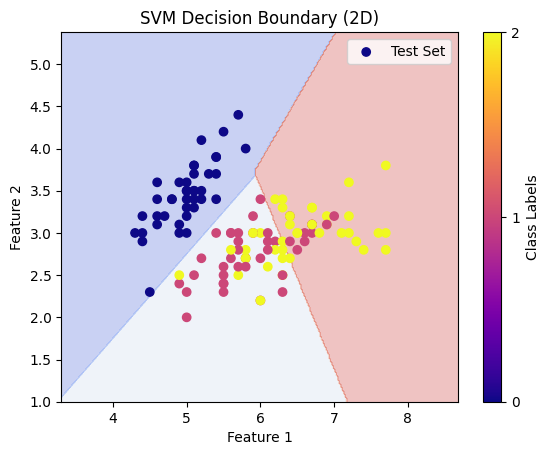

In [51]:
X_visualization = X_train[:,:2]
h = .02 # step size in the mesh
x_min, x_max = X_visualization[:, 0].min() - 1, X_visualization[:, 0].max() + 1
y_min, y_max = X_visualization[:, 1].min() - 1, X_visualization[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Train a new SVM model using only two features
svm_model_2d = SVC(kernel='linear', C=1.0)
svm_model_2d.fit(X_visualization, y_train)
Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap= plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_visualization[:, 0], X_visualization[:, 1], label='Test Set', c=y_train, cmap = plt.cm.plasma)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary (2D)')
plt.colorbar(ticks=np.unique(y_train), label='Class Labels')
plt.legend()
plt.show()